In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Synthetic Dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # Uniformly distributed between -3 and 3
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

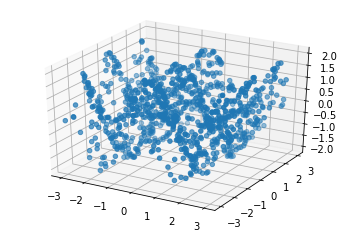

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y);

In [6]:
# Build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [7]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [8]:
# Train the model
def full_gd(model, criterion, optimizer, X_train, Y_train, epochs=1000):
  train_losses = np.zeros(epochs)

  for i in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward Pass
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)

    # Backward and Optimize
    loss.backward()
    optimizer.step()

    train_losses[i] = loss.item()

    if (i + 1) % 50 == 0:
      print(f"Epoch {i+1} / {epochs}, Train Loss: {loss.item():.4f}")

  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
Y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, Y_train)

Epoch 50 / 1000, Train Loss: 0.5952
Epoch 100 / 1000, Train Loss: 0.2802
Epoch 150 / 1000, Train Loss: 0.1819
Epoch 200 / 1000, Train Loss: 0.0952
Epoch 250 / 1000, Train Loss: 0.0441
Epoch 300 / 1000, Train Loss: 0.0138
Epoch 350 / 1000, Train Loss: 0.0059
Epoch 400 / 1000, Train Loss: 0.0046
Epoch 450 / 1000, Train Loss: 0.0030
Epoch 500 / 1000, Train Loss: 0.0025
Epoch 550 / 1000, Train Loss: 0.0022
Epoch 600 / 1000, Train Loss: 0.0023
Epoch 650 / 1000, Train Loss: 0.0032
Epoch 700 / 1000, Train Loss: 0.0018
Epoch 750 / 1000, Train Loss: 0.0017
Epoch 800 / 1000, Train Loss: 0.0017
Epoch 850 / 1000, Train Loss: 0.0042
Epoch 900 / 1000, Train Loss: 0.0015
Epoch 950 / 1000, Train Loss: 0.0018
Epoch 1000 / 1000, Train Loss: 0.0017


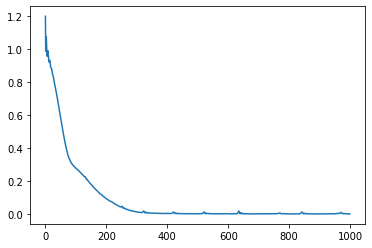

In [10]:
plt.plot(train_losses);

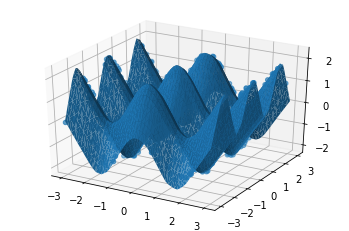

In [11]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface Plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T 
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)

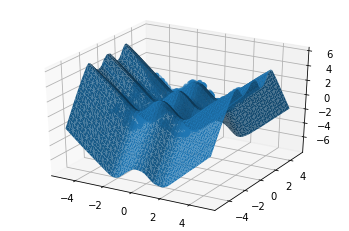

In [12]:
# Neural Network does not use the periodic activation function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T 
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)